In [190]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [70]:
hf_df=pd.read_csv('hf_df.csv')
hf_df.drop(columns='Unnamed: 0',inplace=True)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(hf_df.drop(columns='DEATH_EVENT'), 
                                                    hf_df.DEATH_EVENT, test_size=0.3, 
                                                    random_state=10)

In [72]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
286,90.0,1,337,0,38,0,390000.00,0.90,144,0,0
234,70.0,0,232,0,30,0,173000.00,1.20,132,1,0
20,68.0,1,220,0,35,1,289000.00,0.90,140,1,1
38,70.0,0,582,0,20,1,263358.03,1.83,134,1,1
271,60.0,1,257,1,30,0,150000.00,1.00,137,1,1
...,...,...,...,...,...,...,...,...,...,...,...
156,85.0,1,910,0,50,0,235000.00,1.30,134,1,0
123,43.0,1,358,0,50,0,237000.00,1.30,135,0,0
15,87.0,1,149,0,38,0,262000.00,0.90,140,1,0
125,58.0,1,200,1,60,0,300000.00,0.80,137,0,0


## ENTR no max depth

In [73]:
entr_model=tree.DecisionTreeClassifier(criterion='entropy')
entr_model.fit(X_train,y_train)
y_pred=entr_model.predict(X_test)
y_pred=pd.Series(y_pred)
entr_model

DecisionTreeClassifier(criterion='entropy')

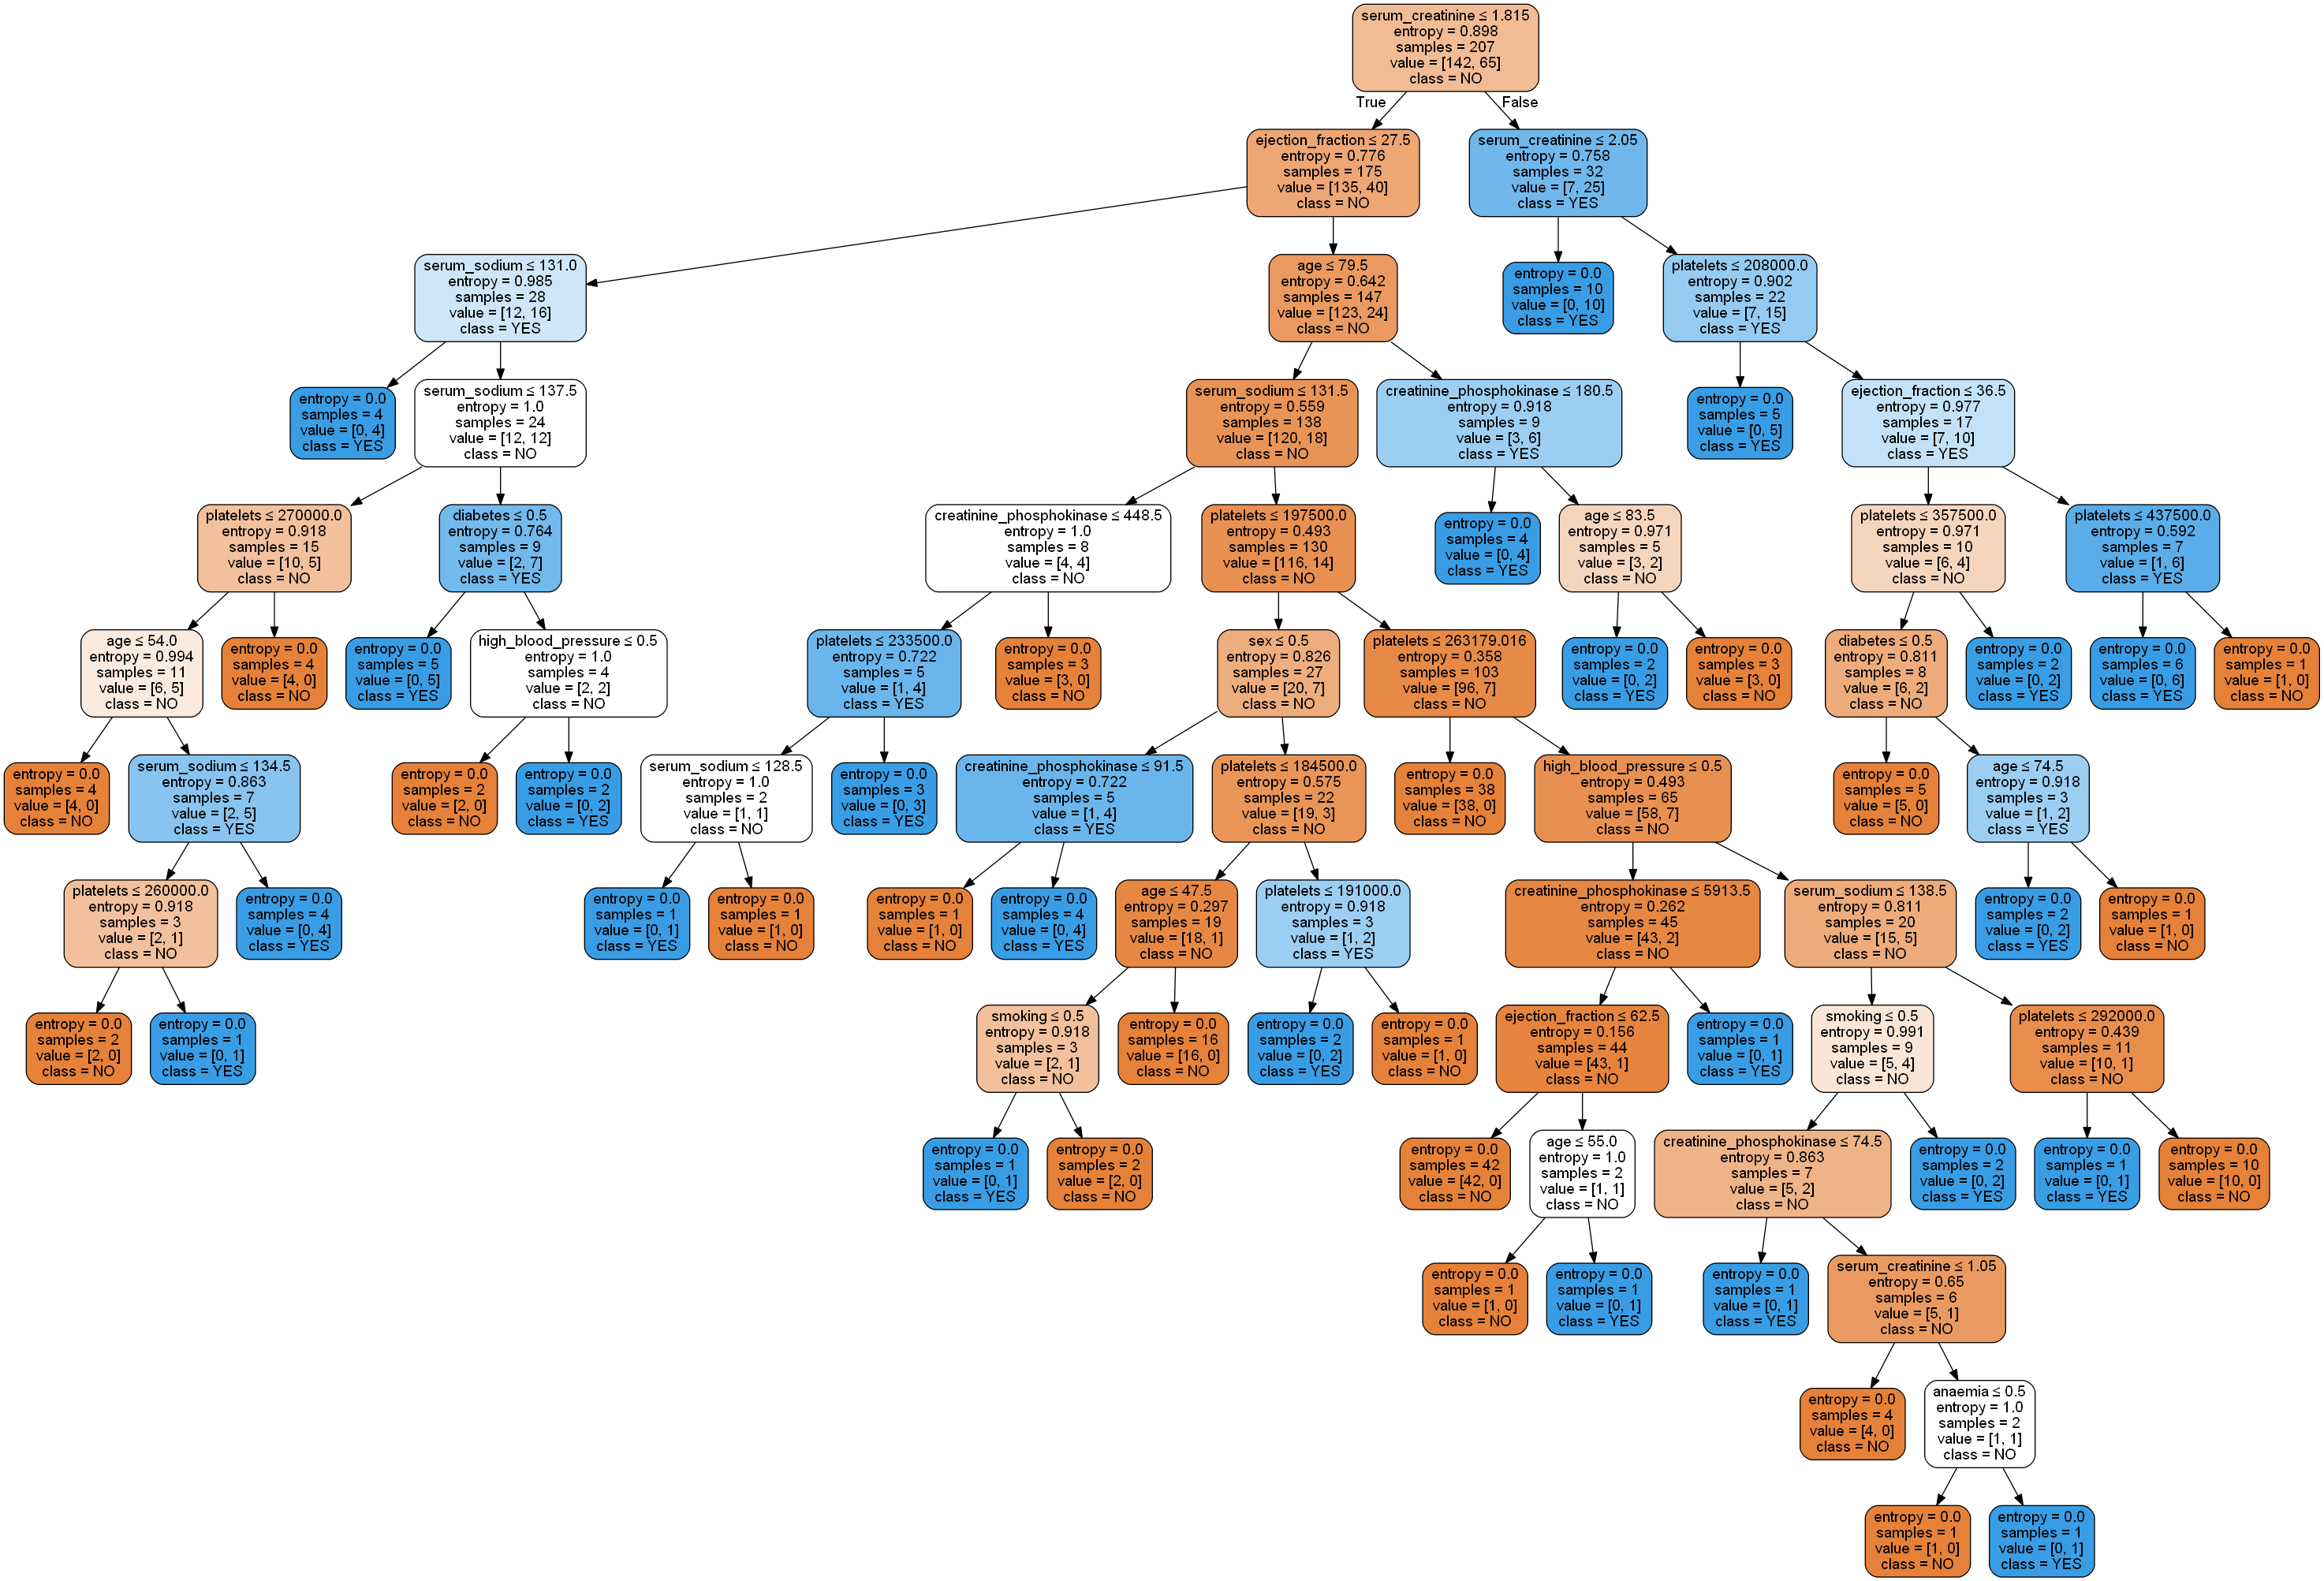

In [74]:
dot_data = StringIO()
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [75]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.651685393258427
Balanced accuracy: 0.6525862068965518
Precision score for "Yes" 0.475
Precision score for "No" 0.7959183673469388
Recall score for "Yes" 0.6551724137931034
Recall score for "No" 0.65


### entr max depth 3

In [79]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
for i in range(1,9):
    entr_model2= tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    entr_model2.fit(X_train, y_train)
    y_pred = entr_model2.predict(X_test)
    y_pred = pd.Series(y_pred)
    print("Model: Entropy model max depth",i)
    print("    Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
    print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
    print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
    print('')

Model Entropy model max depth 1
    Accuracy: 0.6966292134831461
    Balanced accuracy: 0.5879310344827586
    Precision score for "Yes" 0.5714285714285714
    Recall score for "No" 0.9

Model Entropy model max depth 2
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.7014367816091953
    Precision score for "Yes" 0.6071428571428571
    Recall score for "No" 0.8166666666666667

Model Entropy model max depth 3
    Accuracy: 0.7303370786516854
    Balanced accuracy: 0.6485632183908046
    Precision score for "Yes" 0.631578947368421
    Recall score for "No" 0.8833333333333333

Model Entropy model max depth 4
    Accuracy: 0.7415730337078652
    Balanced accuracy: 0.6658045977011494
    Precision score for "Yes" 0.65
    Recall score for "No" 0.8833333333333333

Model Entropy model max depth 5
    Accuracy: 0.7303370786516854
    Balanced accuracy: 0.6752873563218391
    Precision score for "Yes" 0.6
    Recall score for "No" 0.8333333333333334

Model Entropy model max depth 6
   

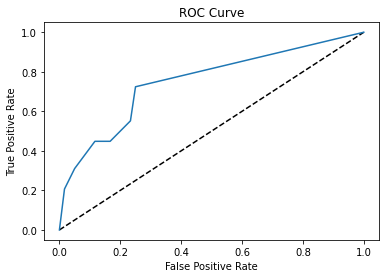

In [128]:
entr_model_final= tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
entr_model_final.fit(X_train, y_train)
y_pred = entr_model_final.predict(X_test)
y_pred = pd.Series(y_pred)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = entr_model_final.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

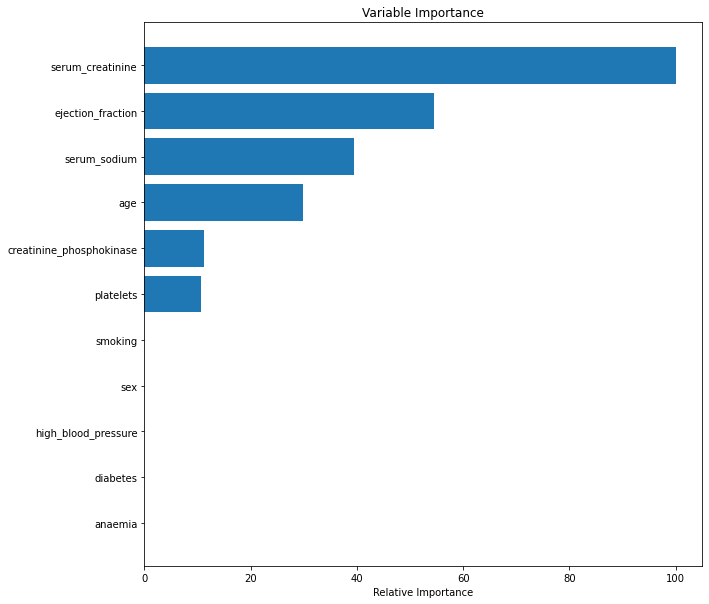

In [116]:
feature_importance = entr_model_final.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


## Gini Impurity model no max depth

In [117]:
gini_model=tree.DecisionTreeClassifier(criterion='gini')
gini_model.fit(X_train,y_train)
y_pred=gini_model.predict(X_test)
y_pred=pd.Series(y_pred)
gini_model

DecisionTreeClassifier()

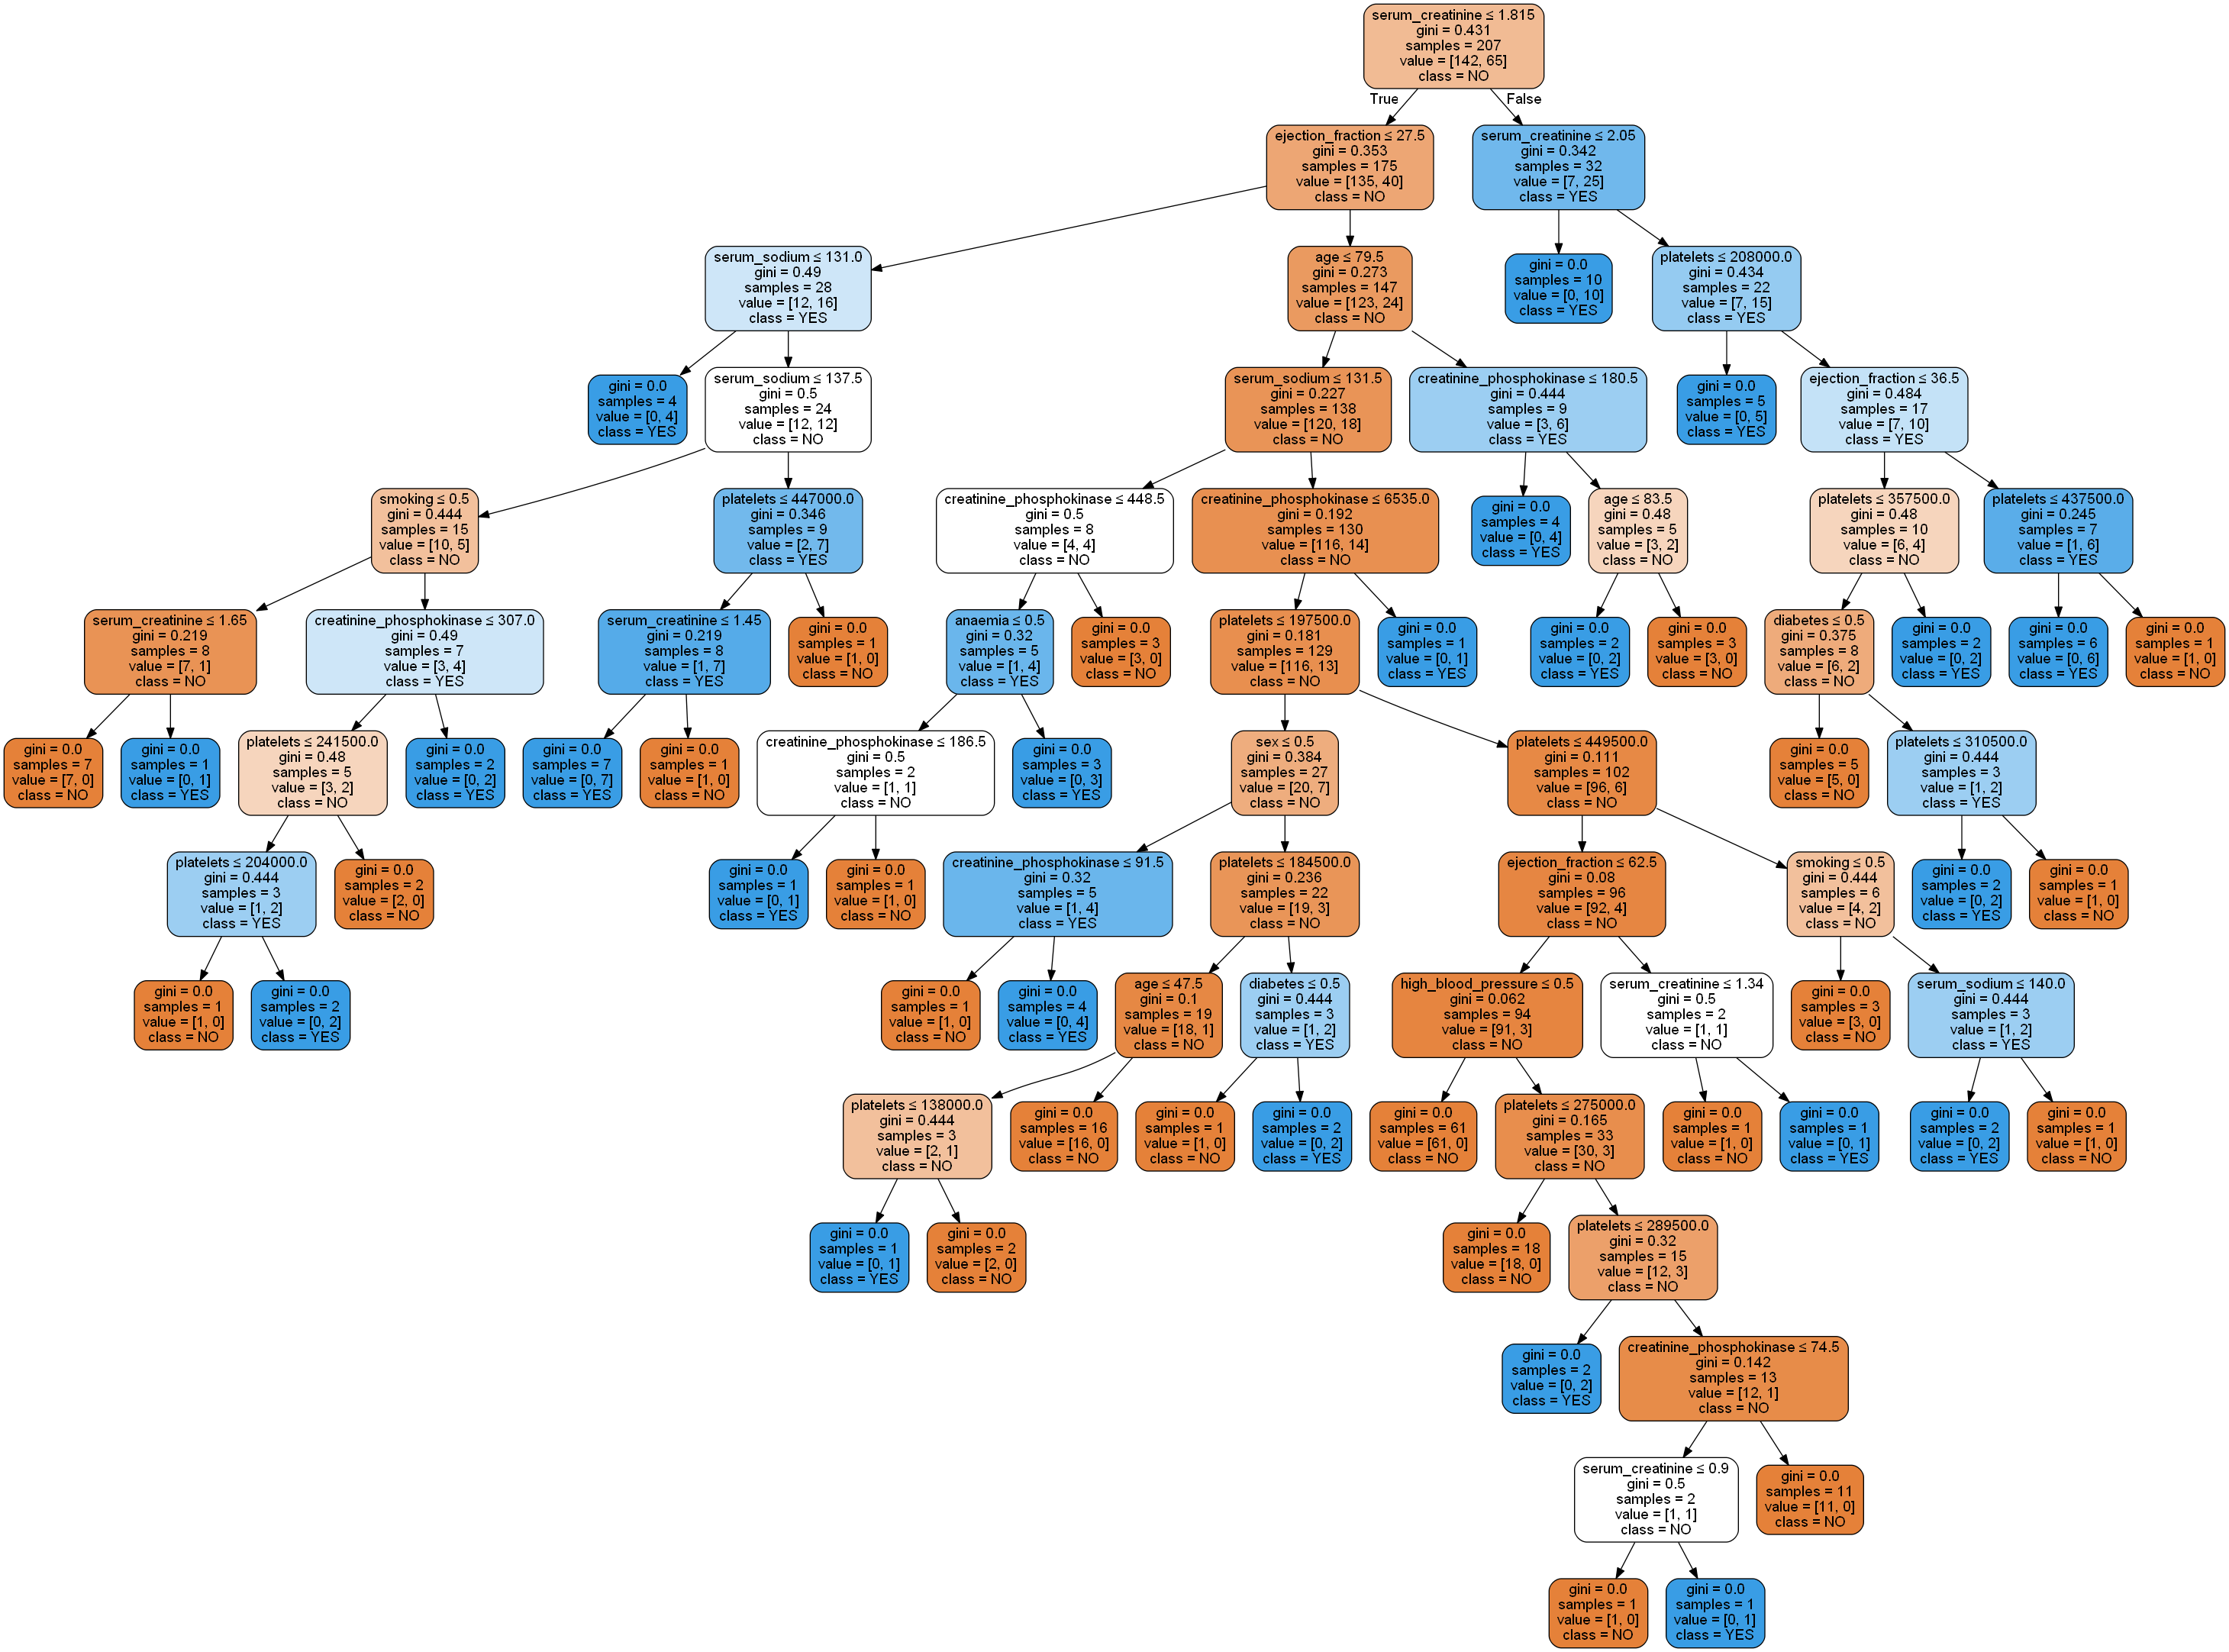

In [118]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [122]:
print("Model: Gini impurity model")
print("     Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("     Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print("     Precision score" , metrics.precision_score(y_test,y_pred, pos_label = 1))
print("     Recall score" , metrics.recall_score(y_test,y_pred, pos_label = 0))


Model: Gini impurity model
     Accuracy: 0.6853932584269663
     Balanced accuracy: 0.6597701149425287
     Precision score 0.5151515151515151
     Recall score 0.7333333333333333


In [124]:
for i in range(1,9):
    gini_model2= tree.DecisionTreeClassifier(criterion="gini", max_depth = i)
    gini_model2.fit(X_train, y_train)
    y_pred = entr_model2.predict(X_test)
    y_pred = pd.Series(y_pred)
    print("Model: Gini model max depth",i)
    print("    Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
    print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
    print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model: Gini model max depth 1
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 2
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 3
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 4
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 5
    Accuracy: 0.6741573033707865
    Balanced accuracy: 0.6514367816091954
    Precision score for "Yes" 0.5
    Recall score for "No" 0.7166666666666667
Model: Gini model max depth 6
    Accuracy: 0.6741573033707865
    Balanced accu

## Random Forest model using RandomSearchCV

In [179]:
RFModel=RandomForestClassifier()
param_grid = { 
    'criterion':['gini', 'entropy'],
    'n_estimators': [i for i in range(1,200)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(1,30)],
}
RandomCV_RFModel = RandomizedSearchCV(estimator=RFModel, param_distributions=param_grid, cv= 5)
RandomCV_RFModel.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                         

In [180]:
RandomCV_RFModel.best_params_

{'n_estimators': 165,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'entropy'}

In [181]:
RFModel=RandomForestClassifier(n_estimators=165,max_features='log2',max_depth=6,criterion='entropy')
RFModel.fit(X_train,y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)
print('"Model: Random Forest"')
print("    Accuracy:", accuracy_score(y_test, y_pred))
print('    f1-score=', f1_score(y_test, y_pred, average='weighted'))
print("    Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('    Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('    Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('    Confusion Matrix:',confusion_matrix(y_test,y_pred))

"Model: Random Forest"
    Accuracy: 0.7191011235955056
    f1-score= 0.703103086021448
    Balanced accuracy: 0.6402298850574712
    Precision score for "Yes" 0.6
    Recall score for "No" 0.8666666666666667
    Confusion Matrix: [[52  8]
 [17 12]]


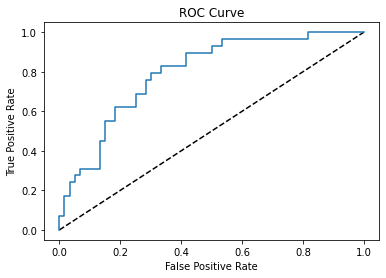

AUC Score: 0.6402298850574712


In [192]:
y_pred_prob = RFModel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('AUC Score:',auc(false_positive_rate, true_positive_rate))


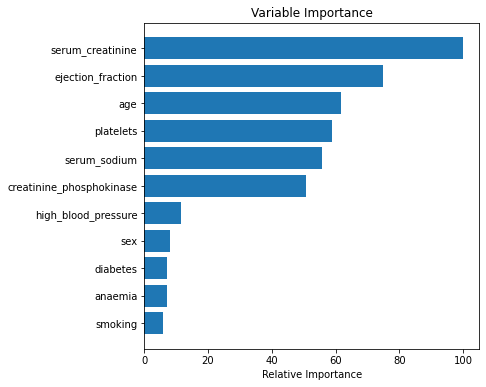

In [188]:
feature_importance = RFModel.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(6,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
